In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
#Import all the libraries and choosing plot style
plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns", 500)
from fredapi import Fred

In [5]:
#i used my API key Here
#create the fred object
fred= Fred(api_key=fred_key)
#search fred for economic data fred allows its users to search and download data
SP_search= fred.search("S&P", order_by="popularity")

In [7]:
SP_search.head(3)

id realtime_start realtime_end  \
series id                                                
BAMLH0A0HYM2  BAMLH0A0HYM2     2025-01-11   2025-01-11   
CSUSHPINSA      CSUSHPINSA     2025-01-11   2025-01-11   
SP500                SP500     2025-01-11   2025-01-11   

                                                          title  \
series id                                                         
BAMLH0A0HYM2  ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA    S&P CoreLogic Case-Shiller U.S. National Home ...   
SP500                                                   S&P 500   

             observation_start observation_end     frequency frequency_short  \
series id                                                                      
BAMLH0A0HYM2        1996-12-31      2025-01-09  Daily, Close               D   
CSUSHPINSA          1987-01-01      2024-10-01       Monthly               M   
SP500               2015-01-12      2025-01-10  Daily, Close               D   

                           units         units_short      seasonal_adjustment  \
series id                                                                       
BAMLH0A0HYM2             Percent                   %  Not Seasonally Adjusted   
CSUSHPINSA    Index Jan 2000=100  Index Jan 2000=100  Not Seasonally Adjusted   
SP500                      Index               Index  Not Seasonally Adjusted   

             seasonal_adjustment_short               last_updated popularity  \
series id                                                                      
BAMLH0A0HYM2                       NSA  2025-01-10 08:37:08-06:00         92   
CSUSHPINSA                         NSA  2024-12-31 08:12:02-06:00         88   
SP500                              NSA  2025-01-10 19:12:04-06:00         83   

                                                          notes  
series id                                                        
BAMLH0A0HYM2  The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA    For more information regarding the index, plea...  
SP500         The observations for the S&P 500 represent the...

In [11]:
#pull raw data
sp500=fred.get_series(series_id="SP500")

<Axes: title={'center': 'S&P 500'}>

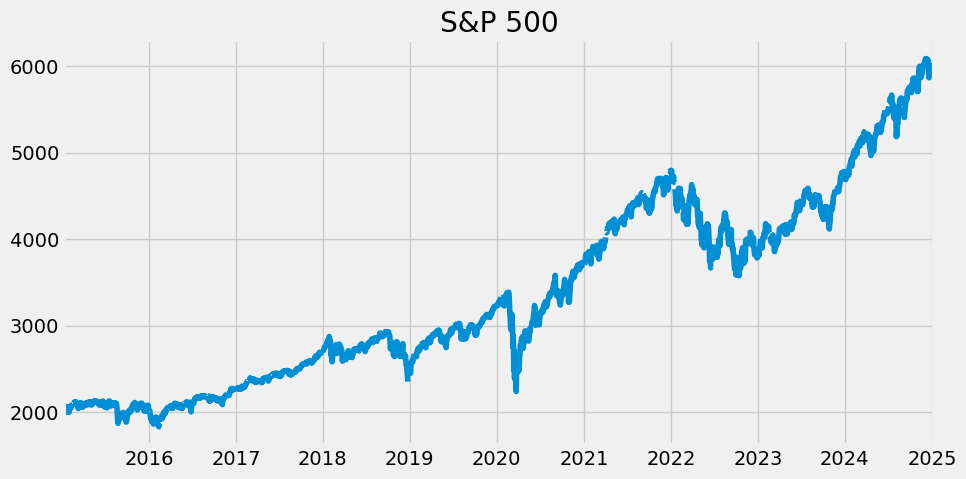

In [13]:
sp500.plot(figsize=(10,5),title="S&P 500",)
#Plot a chart on SP500

In [15]:
unemp_results=fred.search("unemployment")
#pulland join multiple data series
#pull in unemployment rate

In [17]:
unrate=fred.get_series("UNRATE")

<Axes: >

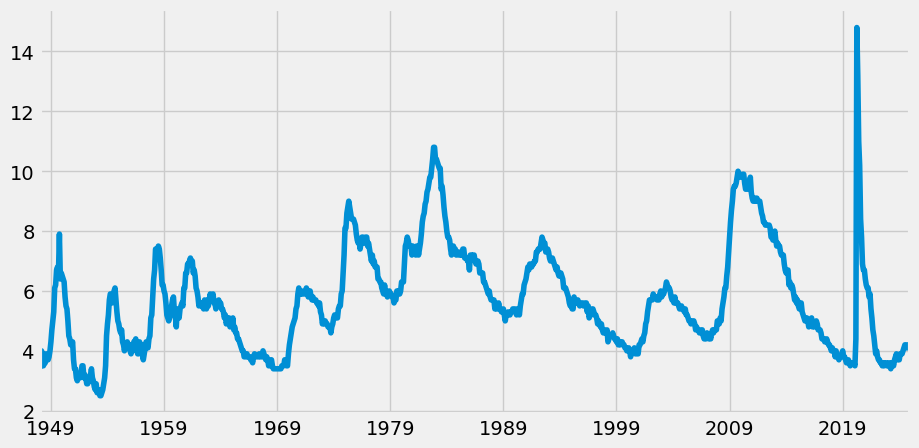

In [19]:
unrate.plot(figsize=(10,5))

In [21]:
#Pull all the data on unemployement using Unmeployement rate state as the keyword the filtered it Monthly by Frequency
unemp_df= fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df["title"]

series id
UNRATE                                         Unemployment Rate
UNRATENSA                                      Unemployment Rate
LNS14000006        Unemployment Rate - Black or African American
UNEMPLOY                                      Unemployment Level
LNU03000000                                   Unemployment Level
                                     ...                        
INBART5URN           Unemployment Rate in Bartholomew County, IN
MOPRURN                    Unemployment Rate in Perry County, MO
PENS812UR      Unemployment Rate in Pensacola-Ferry Pass-Bren...
AKRO439UR                   Unemployment Rate in Akron, OH (MSA)
PORT912UR          Unemployment Rate in Port St. Lucie, FL (MSA)
Name: title, Length: 1000, dtype: object

In [23]:
unemp_df=unemp_df.query('seasonal_adjustment=="Seasonally Adjusted" and units =="Percent"')
#used the query function to filter it by seasonal adjusted and percent
unemp_df=unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate in ")]
#filtered the title by using the keyword unemployement rate in 
unemp_df.head(3)

id realtime_start realtime_end                            title  \
series id                                                                      
CAUR       CAUR     2025-01-11   2025-01-11  Unemployment Rate in California   
TXUR       TXUR     2025-01-11   2025-01-11       Unemployment Rate in Texas   
NYUR       NYUR     2025-01-11   2025-01-11    Unemployment Rate in New York   

          observation_start observation_end frequency frequency_short  \
series id                                                               
CAUR             1976-01-01      2024-11-01   Monthly               M   
TXUR             1976-01-01      2024-11-01   Monthly               M   
NYUR             1976-01-01      2024-11-01   Monthly               M   

             units units_short  seasonal_adjustment seasonal_adjustment_short  \
series id                                                                       
CAUR       Percent           %  Seasonally Adjusted                        SA   
TXUR       Percent           %  Seasonally Adjusted                        SA   
NYUR       Percent           %  Seasonally Adjusted                        SA   

                        last_updated popularity notes  
series id                                              
CAUR       2024-12-23 09:31:02-06:00         64  None  
TXUR       2024-12-23 09:31:03-06:00         56  None  
NYUR       2024-12-23 09:31:03-06:00         53  None

In [25]:
unemp_df.index
#used to check index values

Index(['CAUR', 'TXUR', 'NYUR', 'FLUR', 'PAUR', 'OHUR', 'MIUR', 'ALUR', 'MAUR',
       'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR', 'WIUR', 'VAUR', 'KYUR',
       'SCUR', 'NMUR', 'MNUR', 'TNUR', 'WAUR', 'MDUR', 'ORUR', 'WVUR', 'NVUR',
       'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR', 'PRUR', 'INUR', 'LAUR',
       'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR', 'DCUR', 'MSUR', 'MEUR',
       'NEUR', 'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'RIUR', 'KSUR',
       'WYUR', 'DEUR', 'VTUR', 'SDUR', 'CMWRUR', 'CSOUUR', 'CNERUR', 'CWSTUR',
       'CNEWUR'],
      dtype='object', name='series id')

In [27]:
all_results=[]

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
#Created a loop that turns every index into a column in a list replacing the index with the dates and turns it into a dataframe 
#


In [29]:
all_results[1].head()

TXUR
1976-01-01   5.8
1976-02-01   5.8
1976-03-01   5.9
1976-04-01   5.9
1976-05-01   5.9

In [33]:
pd.concat(all_results, axis=1).head()
#combined all the dataframes into one using the concat function

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   

            PRUR  INUR  LAUR  HIUR  LASMT261982000000003  NDUR  MTUR  DCUR  \
1976-01-01  19.6   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-02-01  19.5   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-03-01  19.3   6.5   6.3   9.8                   NaN   3.4   5.8   8.6   
1976-04-01  19.0   6.3   6.4   9.7                   NaN   3.5   5.8   8.5   
1976-05-01  18.9   6.0   6.5   9.4                   NaN   3.6   5.8   8.4   

            MSUR  MEUR  NEUR  LASMT391746000000003  CTUR  IDUR  NHUR  RIUR  \
1976-01-01   6.7   8.7   3.3                   NaN   9.8   5.6   6.5   7.8   
1976-02-01   6.7   8.7   3.3                   NaN   9.8   5.6   6.5   7.8   
1976-03-01   6.6   8.6   3.3                   NaN   9.8   5.6   6.5   7.7   
1976-04-01   6.4   8.6   3.2                   NaN   9.6   5.6   6.5   7.7   
1976-05-01   6.3   8.5   3.1                   NaN   9.4   5.6   6.5   7.7   

            KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  CNERUR  CWSTUR  \
1976-01-01   4.2   4.1   8.0   8.6   3.3     6.8     6.9     9.6     8.6   
1976-02-01   4.2   4.1   8.0   8.6   3.3     6.8     6.9     9.6     8.6   
1976-03-01   4.2   4.1   8.0   8.6   3.2     6.8     6.9     9.6     8.6   
1976-04-01   4.2   4.0   8.1   8.6   3.1     6.7     6.8     9.5     8.5   
1976-05-01   4.2   3.9   8.3   8.5   3.1     6.6     6.7     9.5     8.5   

            CNEWUR  
1976-01-01     9.6  
1976-02-01     9.6  
1976-03-01     9.6  
1976-04-01     9.4  
1976-05-01     9.3

In [39]:
unemp_results = pd.concat(all_results, axis=1)
unemp_results.head()

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   

            PRUR  INUR  LAUR  HIUR  LASMT261982000000003  NDUR  MTUR  DCUR  \
1976-01-01  19.6   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-02-01  19.5   6.6   6.3   9.8                   NaN   3.4   5.8   8.7   
1976-03-01  19.3   6.5   6.3   9.8                   NaN   3.4   5.8   8.6   
1976-04-01  19.0   6.3   6.4   9.7                   NaN   3.5   5.8   8.5   
1976-05-01  18.9   6.0   6.5   9.4                   NaN   3.6   5.8   8.4   

            MSUR  MEUR  NEUR  LASMT391746000000003  CTUR  IDUR  NHUR  RIUR  \
1976-01-01   6.7   8.7   3.3                   NaN   9.8   5.6   6.5   7.8   
1976-02-01   6.7   8.7   3.3                   NaN   9.8   5.6   6.5   7.8   
1976-03-01   6.6   8.6   3.3                   NaN   9.8   5.6   6.5   7.7   
1976-04-01   6.4   8.6   3.2                   NaN   9.6   5.6   6.5   7.7   
1976-05-01   6.3   8.5   3.1                   NaN   9.4   5.6   6.5   7.7   

            KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  CNERUR  CWSTUR  \
1976-01-01   4.2   4.1   8.0   8.6   3.3     6.8     6.9     9.6     8.6   
1976-02-01   4.2   4.1   8.0   8.6   3.3     6.8     6.9     9.6     8.6   
1976-03-01   4.2   4.1   8.0   8.6   3.2     6.8     6.9     9.6     8.6   
1976-04-01   4.2   4.0   8.1   8.6   3.1     6.7     6.8     9.5     8.5   
1976-05-01   4.2   3.9   8.3   8.5   3.1     6.6     6.7     9.5     8.5   

            CNEWUR  
1976-01-01     9.6  
1976-02-01     9.6  
1976-03-01     9.6  
1976-04-01     9.4  
1976-05-01     9.3

In [51]:
#unemp_results.drop(columns="LASMT261982000000003",inplace=True )
unemp_results.drop(columns="LASMT391746000000003",inplace=True )
#dropped the two columns


In [53]:
unemp_results.head()

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1976-01-01  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-02-01  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-03-01  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   
1976-04-01  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   
1976-05-01  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  \
1976-01-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3     6.8     6.9   
1976-02-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3     6.8     6.9   
1976-03-01   5.6   6.5   7.7   4.2   4.1   8.0   8.6   3.2     6.8     6.9   
1976-04-01   5.6   6.5   7.7   4.2   4.0   8.1   8.6   3.1     6.7     6.8   
1976-05-01   5.6   6.5   7.7   4.2   3.9   8.3   8.5   3.1     6.6     6.7   

            CNERUR  CWSTUR  CNEWUR  
1976-01-01     9.6     8.6     9.6  
1976-02-01     9.6     8.6     9.6  
1976-03-01     9.6     8.6     9.6  
1976-04-01     9.5     8.5     9.4  
1976-05-01     9.5     8.5     9.3

In [69]:
unemp_states = unemp_results
unemp_states.head()
#unemp_states = unemp_states.dropna()

CAUR  TXUR  NYUR  FLUR  PAUR  OHUR  MIUR  ALUR  MAUR  NCUR  ILUR  \
1976-01-01   9.2   5.8  10.3   9.7   8.0   8.1   9.9   6.6  10.5   6.4   6.6   
1976-02-01   9.2   5.8  10.3   9.7   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-03-01   9.1   5.9  10.2   9.6   8.1   8.1   9.9   6.6  10.5   6.4   6.6   
1976-04-01   9.1   5.9  10.2   9.5   8.1   8.0   9.8   6.5  10.3   6.3   6.6   
1976-05-01   9.0   5.9  10.1   9.3   8.1   7.8   9.6   6.4  10.1   6.1   6.6   

            NJUR  GAUR  COUR  AZUR  WIUR  VAUR  KYUR  SCUR  NMUR  MNUR  TNUR  \
1976-01-01  10.3   8.4   5.8  10.2   5.8   6.1   5.6   7.4   8.6   6.0   6.0   
1976-02-01  10.3   8.4   5.7  10.2   5.8   6.1   5.6   7.4   8.7   6.0   6.0   
1976-03-01  10.3   8.4   5.7  10.1   5.7   6.1   5.6   7.3   8.7   5.9   6.0   
1976-04-01  10.3   8.3   5.6  10.0   5.6   6.0   5.6   7.2   8.6   5.8   6.0   
1976-05-01  10.3   8.1   5.6   9.8   5.5   5.9   5.5   7.0   8.6   5.7   5.9   

            WAUR  MDUR  ORUR  WVUR  NVUR  ARUR  OKUR  MOUR  AKUR  IAUR  UTUR  \
1976-01-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.8   
1976-02-01   8.5   6.4   9.5   7.5   9.2   7.3   5.8   5.9   7.1   4.3   5.9   
1976-03-01   8.4   6.4   9.4   7.5   9.2   7.3   5.8   5.9   7.0   4.3   5.8   
1976-04-01   8.5   6.4   9.2   7.5   9.0   7.2   5.8   6.0   6.9   4.2   5.8   
1976-05-01   8.5   6.5   9.1   7.4   8.9   7.1   5.7   6.0   6.9   4.1   5.7   

            PRUR  INUR  LAUR  HIUR  NDUR  MTUR  DCUR  MSUR  MEUR  NEUR  CTUR  \
1976-01-01  19.6   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-02-01  19.5   6.6   6.3   9.8   3.4   5.8   8.7   6.7   8.7   3.3   9.8   
1976-03-01  19.3   6.5   6.3   9.8   3.4   5.8   8.6   6.6   8.6   3.3   9.8   
1976-04-01  19.0   6.3   6.4   9.7   3.5   5.8   8.5   6.4   8.6   3.2   9.6   
1976-05-01  18.9   6.0   6.5   9.4   3.6   5.8   8.4   6.3   8.5   3.1   9.4   

            IDUR  NHUR  RIUR  KSUR  WYUR  DEUR  VTUR  SDUR  CMWRUR  CSOUUR  \
1976-01-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3     6.8     6.9   
1976-02-01   5.6   6.5   7.8   4.2   4.1   8.0   8.6   3.3     6.8     6.9   
1976-03-01   5.6   6.5   7.7   4.2   4.1   8.0   8.6   3.2     6.8     6.9   
1976-04-01   5.6   6.5   7.7   4.2   4.0   8.1   8.6   3.1     6.7     6.8   
1976-05-01   5.6   6.5   7.7   4.2   3.9   8.3   8.5   3.1     6.6     6.7   

            CNERUR  CWSTUR  CNEWUR  
1976-01-01     9.6     8.6     9.6  
1976-02-01     9.6     8.6     9.6  
1976-03-01     9.6     8.6     9.6  
1976-04-01     9.5     8.5     9.4  
1976-05-01     9.5     8.5     9.3

<Axes: >

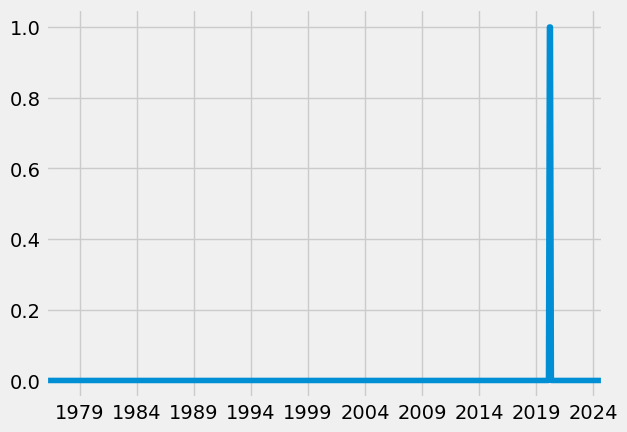

In [71]:
unemp_states.isna().sum(axis=1).plot()

In [73]:
unemp_states = unemp_states.dropna()

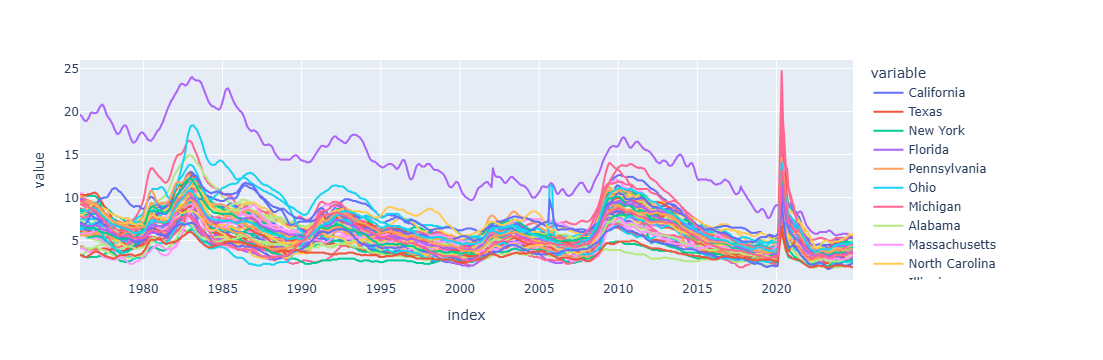

In [83]:
#Plot States Unemployment rate
px.line(unemp_states)
#i revisualized it to show the states

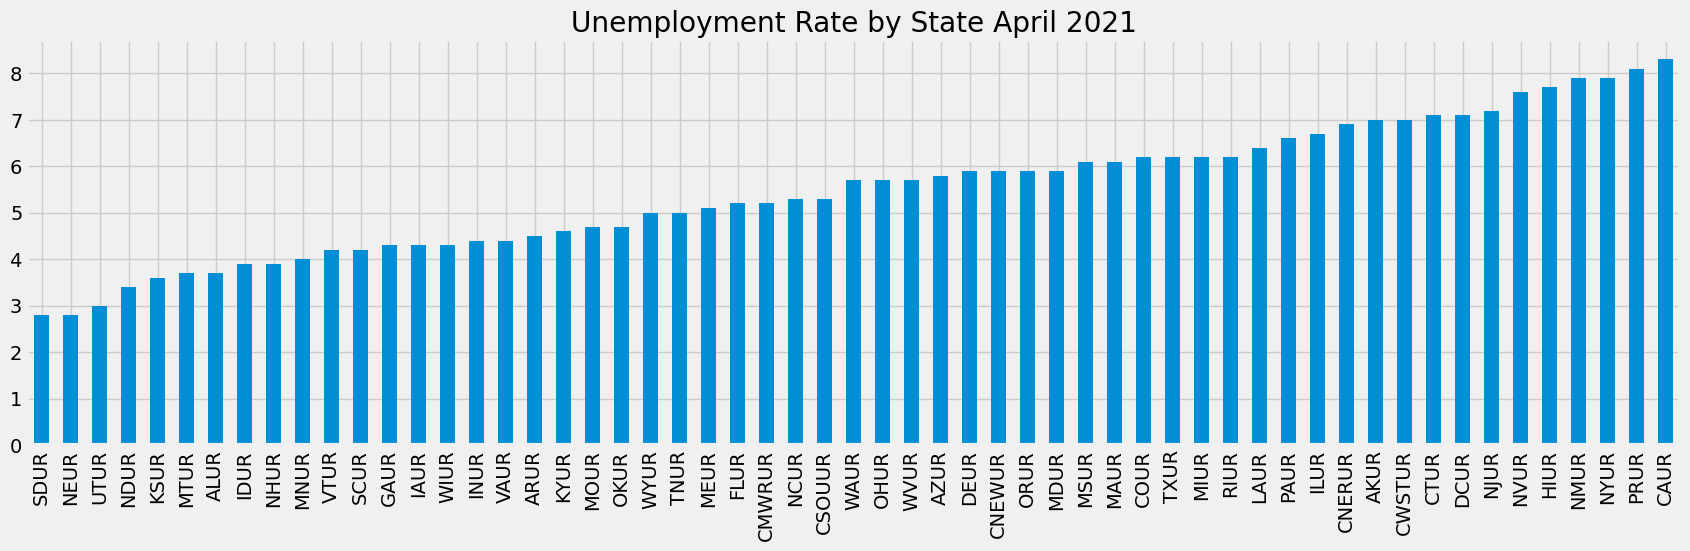

In [77]:
#Pull April 2021 unemployment rate per state
vx= unemp_states.loc[unemp_states.index == "2021-04-01"].T.sort_values("2021-04-01").plot(kind="bar", figsize=(19,5), title="Unemployment Rate by State April 2021")#(T transforms the the dataframe into proper columns)
vx.legend().remove()
plt.show()

In [79]:
id_to_state= unemp_df["title"].str.replace("Unemployment Rate in ", "").to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]
# replaced the name of the columns with the title column of unemp_df and used the str. replace function to remove unemployment rate in to show only state names

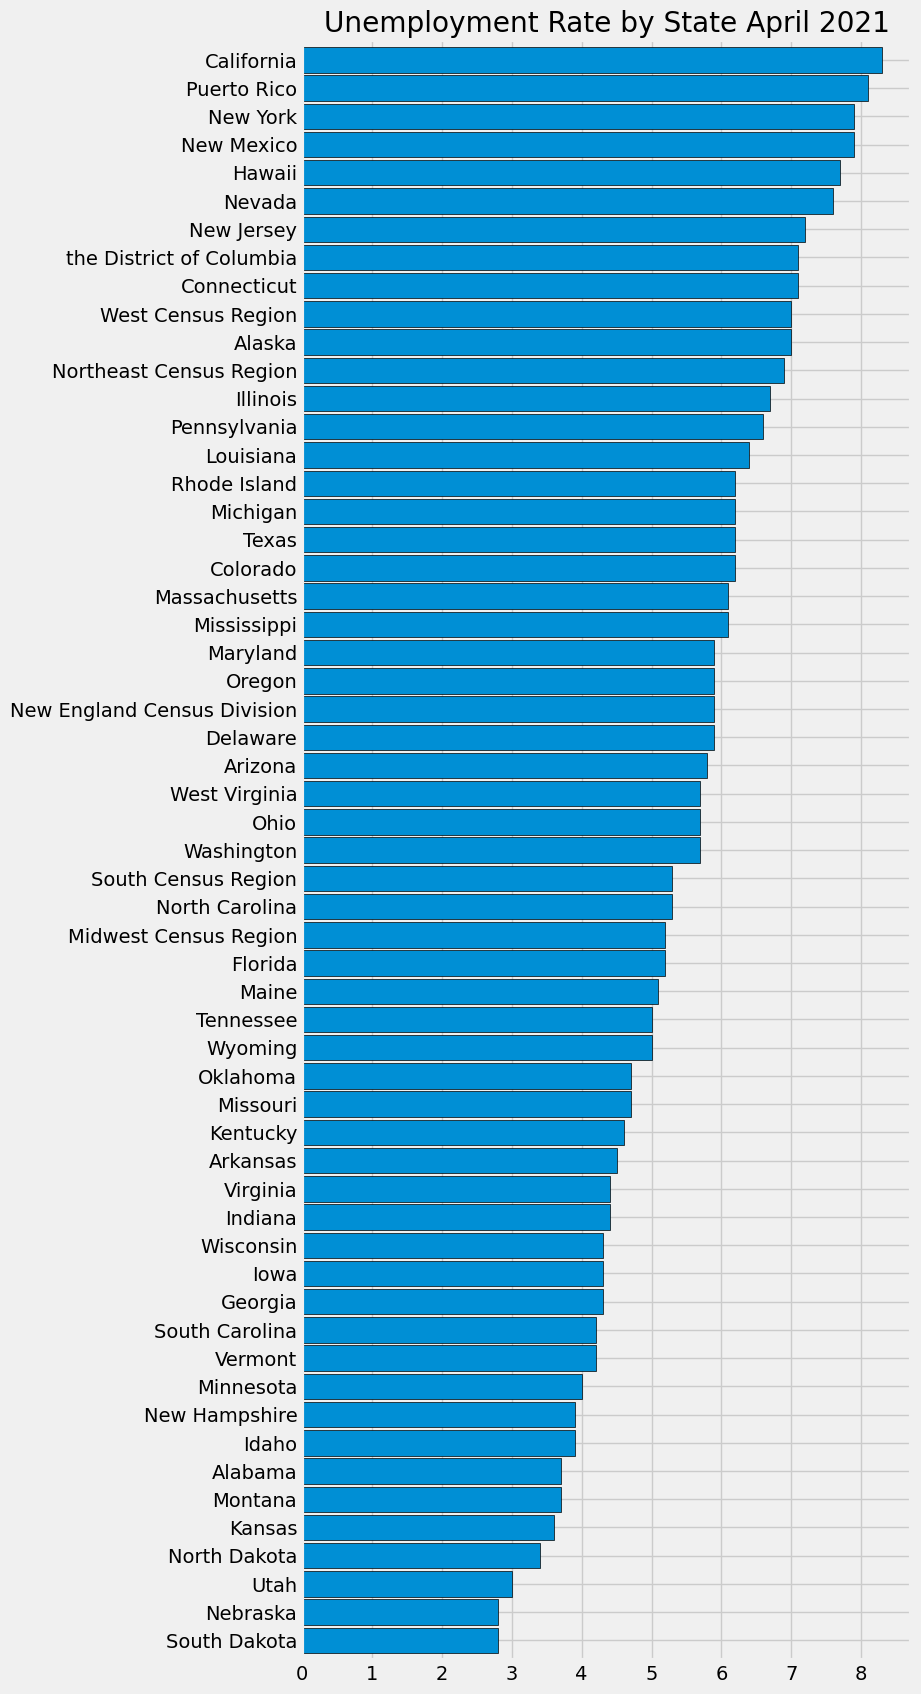

In [81]:
vx= unemp_states.loc[unemp_states.index == "2021-04-01"].T.sort_values("2021-04-01").plot(kind="barh", figsize=(7,20),width=0.9,edgecolor="black", title="Unemployment Rate by State April 2021")#(T transforms the the dataframe into proper columns)
vx.legend().remove()
plt.show()

In [87]:
unemp_states.head()

California  Texas  New York  Florida  Pennsylvania  Ohio  \
1976-01-01         9.2    5.8      10.3      9.7           8.0   8.1   
1976-02-01         9.2    5.8      10.3      9.7           8.1   8.1   
1976-03-01         9.1    5.9      10.2      9.6           8.1   8.1   
1976-04-01         9.1    5.9      10.2      9.5           8.1   8.0   
1976-05-01         9.0    5.9      10.1      9.3           8.1   7.8   

            Michigan  Alabama  Massachusetts  North Carolina  Illinois  \
1976-01-01       9.9      6.6           10.5             6.4       6.6   
1976-02-01       9.9      6.6           10.5             6.4       6.6   
1976-03-01       9.9      6.6           10.5             6.4       6.6   
1976-04-01       9.8      6.5           10.3             6.3       6.6   
1976-05-01       9.6      6.4           10.1             6.1       6.6   

            New Jersey  Georgia  Colorado  Arizona  Wisconsin  Virginia  \
1976-01-01        10.3      8.4       5.8     10.2        5.8       6.1   
1976-02-01        10.3      8.4       5.7     10.2        5.8       6.1   
1976-03-01        10.3      8.4       5.7     10.1        5.7       6.1   
1976-04-01        10.3      8.3       5.6     10.0        5.6       6.0   
1976-05-01        10.3      8.1       5.6      9.8        5.5       5.9   

            Kentucky  South Carolina  New Mexico  Minnesota  Tennessee  \
1976-01-01       5.6             7.4         8.6        6.0        6.0   
1976-02-01       5.6             7.4         8.7        6.0        6.0   
1976-03-01       5.6             7.3         8.7        5.9        6.0   
1976-04-01       5.6             7.2         8.6        5.8        6.0   
1976-05-01       5.5             7.0         8.6        5.7        5.9   

            Washington  Maryland  Oregon  West Virginia  Nevada  Arkansas  \
1976-01-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-02-01         8.5       6.4     9.5            7.5     9.2       7.3   
1976-03-01         8.4       6.4     9.4            7.5     9.2       7.3   
1976-04-01         8.5       6.4     9.2            7.5     9.0       7.2   
1976-05-01         8.5       6.5     9.1            7.4     8.9       7.1   

            Oklahoma  Missouri  Alaska  Iowa  Utah  Puerto Rico  Indiana  \
1976-01-01       5.8       5.9     7.1   4.3   5.8         19.6      6.6   
1976-02-01       5.8       5.9     7.1   4.3   5.9         19.5      6.6   
1976-03-01       5.8       5.9     7.0   4.3   5.8         19.3      6.5   
1976-04-01       5.8       6.0     6.9   4.2   5.8         19.0      6.3   
1976-05-01       5.7       6.0     6.9   4.1   5.7         18.9      6.0   

            Louisiana  Hawaii  North Dakota  Montana  \
1976-01-01        6.3     9.8           3.4      5.8   
1976-02-01        6.3     9.8           3.4      5.8   
1976-03-01        6.3     9.8           3.4      5.8   
1976-04-01        6.4     9.7           3.5      5.8   
1976-05-01        6.5     9.4           3.6      5.8   

            the District of Columbia  Mississippi  Maine  Nebraska  \
1976-01-01                       8.7          6.7    8.7       3.3   
1976-02-01                       8.7          6.7    8.7       3.3   
1976-03-01                       8.6          6.6    8.6       3.3   
1976-04-01                       8.5          6.4    8.6       3.2   
1976-05-01                       8.4          6.3    8.5       3.1   

            Connecticut  Idaho  New Hampshire  Rhode Island  Kansas  Wyoming  \
1976-01-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-02-01          9.8    5.6            6.5           7.8     4.2      4.1   
1976-03-01          9.8    5.6            6.5           7.7     4.2      4.1   
1976-04-01          9.6    5.6            6.5           7.7     4.2      4.0   
1976-05-01          9.4    5.6            6.5           7.7     4.2      3.9   

            Delaware  Vermont  South Dakota  Midwest Census Region  \
1976-01-0

In [89]:
#did the same thing or the participation rate for each state
#Pull participation rate
part_df=fred.search("participation rate state", filter=("frequency","Monthly"))
part_df=part_df.query('seasonal_adjustment=="Seasonally Adjusted" and units =="Percent"')

In [91]:
part_df=part_df.loc[part_df["title"].str.contains("Labor Force Participation Rate for")]

In [93]:
all_results=[]

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
  
part_states= pd.concat(all_results, axis=1)

In [97]:
part_id_to_state= part_df["title"].str.replace("Labor Force Participation Rate for ", "").to_dict()
part_states.columns = [part_id_to_state[c] for c in part_states.columns]
#i ran it twice thats why this error came up

KeyError: 'California'

In [99]:
part_states=part_states.dropna()
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah',
       'Puerto Rico', 'Indiana', 'Louisiana', 'Hawaii', 'North Dakota',
       'Montana', 'the District of Columbia', 'Mississippi', 'Maine',
       'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire', 'Rhode Island',
       'Kansas', 'Wyoming', 'Delaware', 'Vermont', 'South Dakota',
       'Midwest Census Region', 'South Census Region',
       'Northeast Census Region', 'West Census Region',
       'New England Census Division'],
      dtype='object')

Text(0.5, 1.0, 'New York')

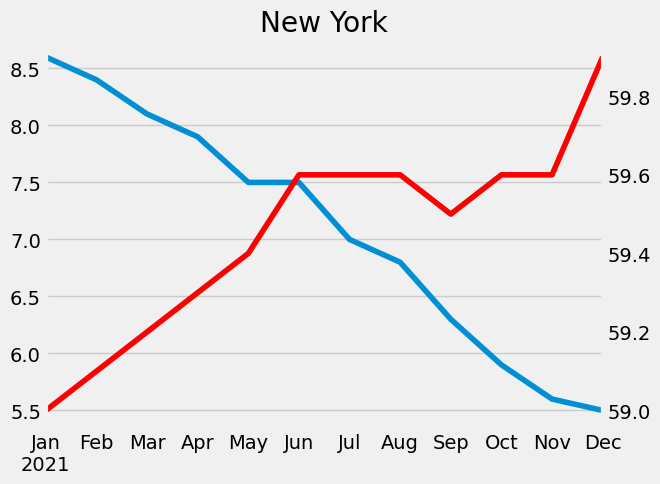

In [105]:
fig, ax = plt.subplots()
ax2 = ax.twinx()
unemp_states.query("index >= 2021 and index < 2022")["New York"] \
    .plot(ax=ax, label="Unemployment")
part_states.query("index >= 2021 and index < 2022")["New York"] \
    .plot(ax=ax2, label="Participation", color="Red")
ax2.grid(False)
ax.set_title("New York")

In [107]:
part_states.drop(columns="District Of Columbia", inplace=True)
#i had to delete some of the columns 
#in the unemployments states dataframe i had to delete midwest census region because it wasnt in the participation dataframe
# i deletewd district of columbia because i wanted to

unemp_states.drop(columns="Midwest Census Region", inplace=True)
unemp_states.drop(columns="South Census Region", inplace=True)
unemp_states.drop(columns="Northeast Census Region", inplace=True)
unemp_states.drop(columns="West Census Region", inplace=True)
unemp_states.drop(columns="New England Census Division", inplace=True)
unemp_states.drop(columns="Puerto Rico", inplace=True)
unemp_states.drop(columns="the District of Columbia", inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9928\689916550.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_9928\689916550.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_9928\689916550.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\DELL\AppData\Local\Temp\ipykernel_9928\689916550.py:9: SettingWithCopyWarning:


A value is trying t

In [109]:
unemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Pennsylvania', 'Ohio',
       'Michigan', 'Alabama', 'Massachusetts', 'North Carolina', 'Illinois',
       'New Jersey', 'Georgia', 'Colorado', 'Arizona', 'Wisconsin', 'Virginia',
       'Kentucky', 'South Carolina', 'New Mexico', 'Minnesota', 'Tennessee',
       'Washington', 'Maryland', 'Oregon', 'West Virginia', 'Nevada',
       'Arkansas', 'Oklahoma', 'Missouri', 'Alaska', 'Iowa', 'Utah', 'Indiana',
       'Louisiana', 'Hawaii', 'North Dakota', 'Montana', 'Mississippi',
       'Maine', 'Nebraska', 'Connecticut', 'Idaho', 'New Hampshire',
       'Rhode Island', 'Kansas', 'Wyoming', 'Delaware', 'Vermont',
       'South Dakota'],
      dtype='object')

In [111]:
part_states.columns

Index(['California', 'Alabama', 'New York', 'Michigan', 'Mississippi', 'Texas',
       'Florida', 'Kentucky', 'Ohio', 'Wisconsin', 'Pennsylvania',
       'Massachusetts', 'Minnesota', 'Maryland', 'West Virginia', 'Tennessee',
       'Maine', 'Illinois', 'North Carolina', 'Georgia', 'Louisiana',
       'South Carolina', 'Colorado', 'Utah', 'Virginia', 'Indiana', 'Missouri',
       'New Jersey', 'Iowa', 'Alaska', 'Washington', 'Arizona', 'New Mexico',
       'Idaho', 'Arkansas', 'Oklahoma', 'Nebraska', 'Hawaii', 'Nevada',
       'Montana', 'Oregon', 'New Hampshire', 'Vermont', 'Connecticut',
       'North Dakota', 'South Dakota', 'Kansas', 'Rhode Island', 'Delaware',
       'Wyoming'],
      dtype='object')

Processing state: California
Processing state: Texas
Processing state: New York
Processing state: Florida
Processing state: Pennsylvania
Processing state: Ohio
Processing state: Michigan
Processing state: Alabama
Processing state: Massachusetts
Processing state: North Carolina
Processing state: Illinois
Processing state: New Jersey
Processing state: Georgia
Processing state: Colorado
Processing state: Arizona
Processing state: Wisconsin
Processing state: Virginia
Processing state: Kentucky
Processing state: South Carolina
Processing state: New Mexico
Processing state: Minnesota
Processing state: Tennessee
Processing state: Washington
Processing state: Maryland
Processing state: Oregon
Processing state: West Virginia
Processing state: Nevada
Processing state: Arkansas
Processing state: Oklahoma
Processing state: Missouri
Processing state: Alaska
Processing state: Iowa
Processing state: Utah
Processing state: Indiana
Processing state: Louisiana
Processing state: Hawaii
Processing state: 

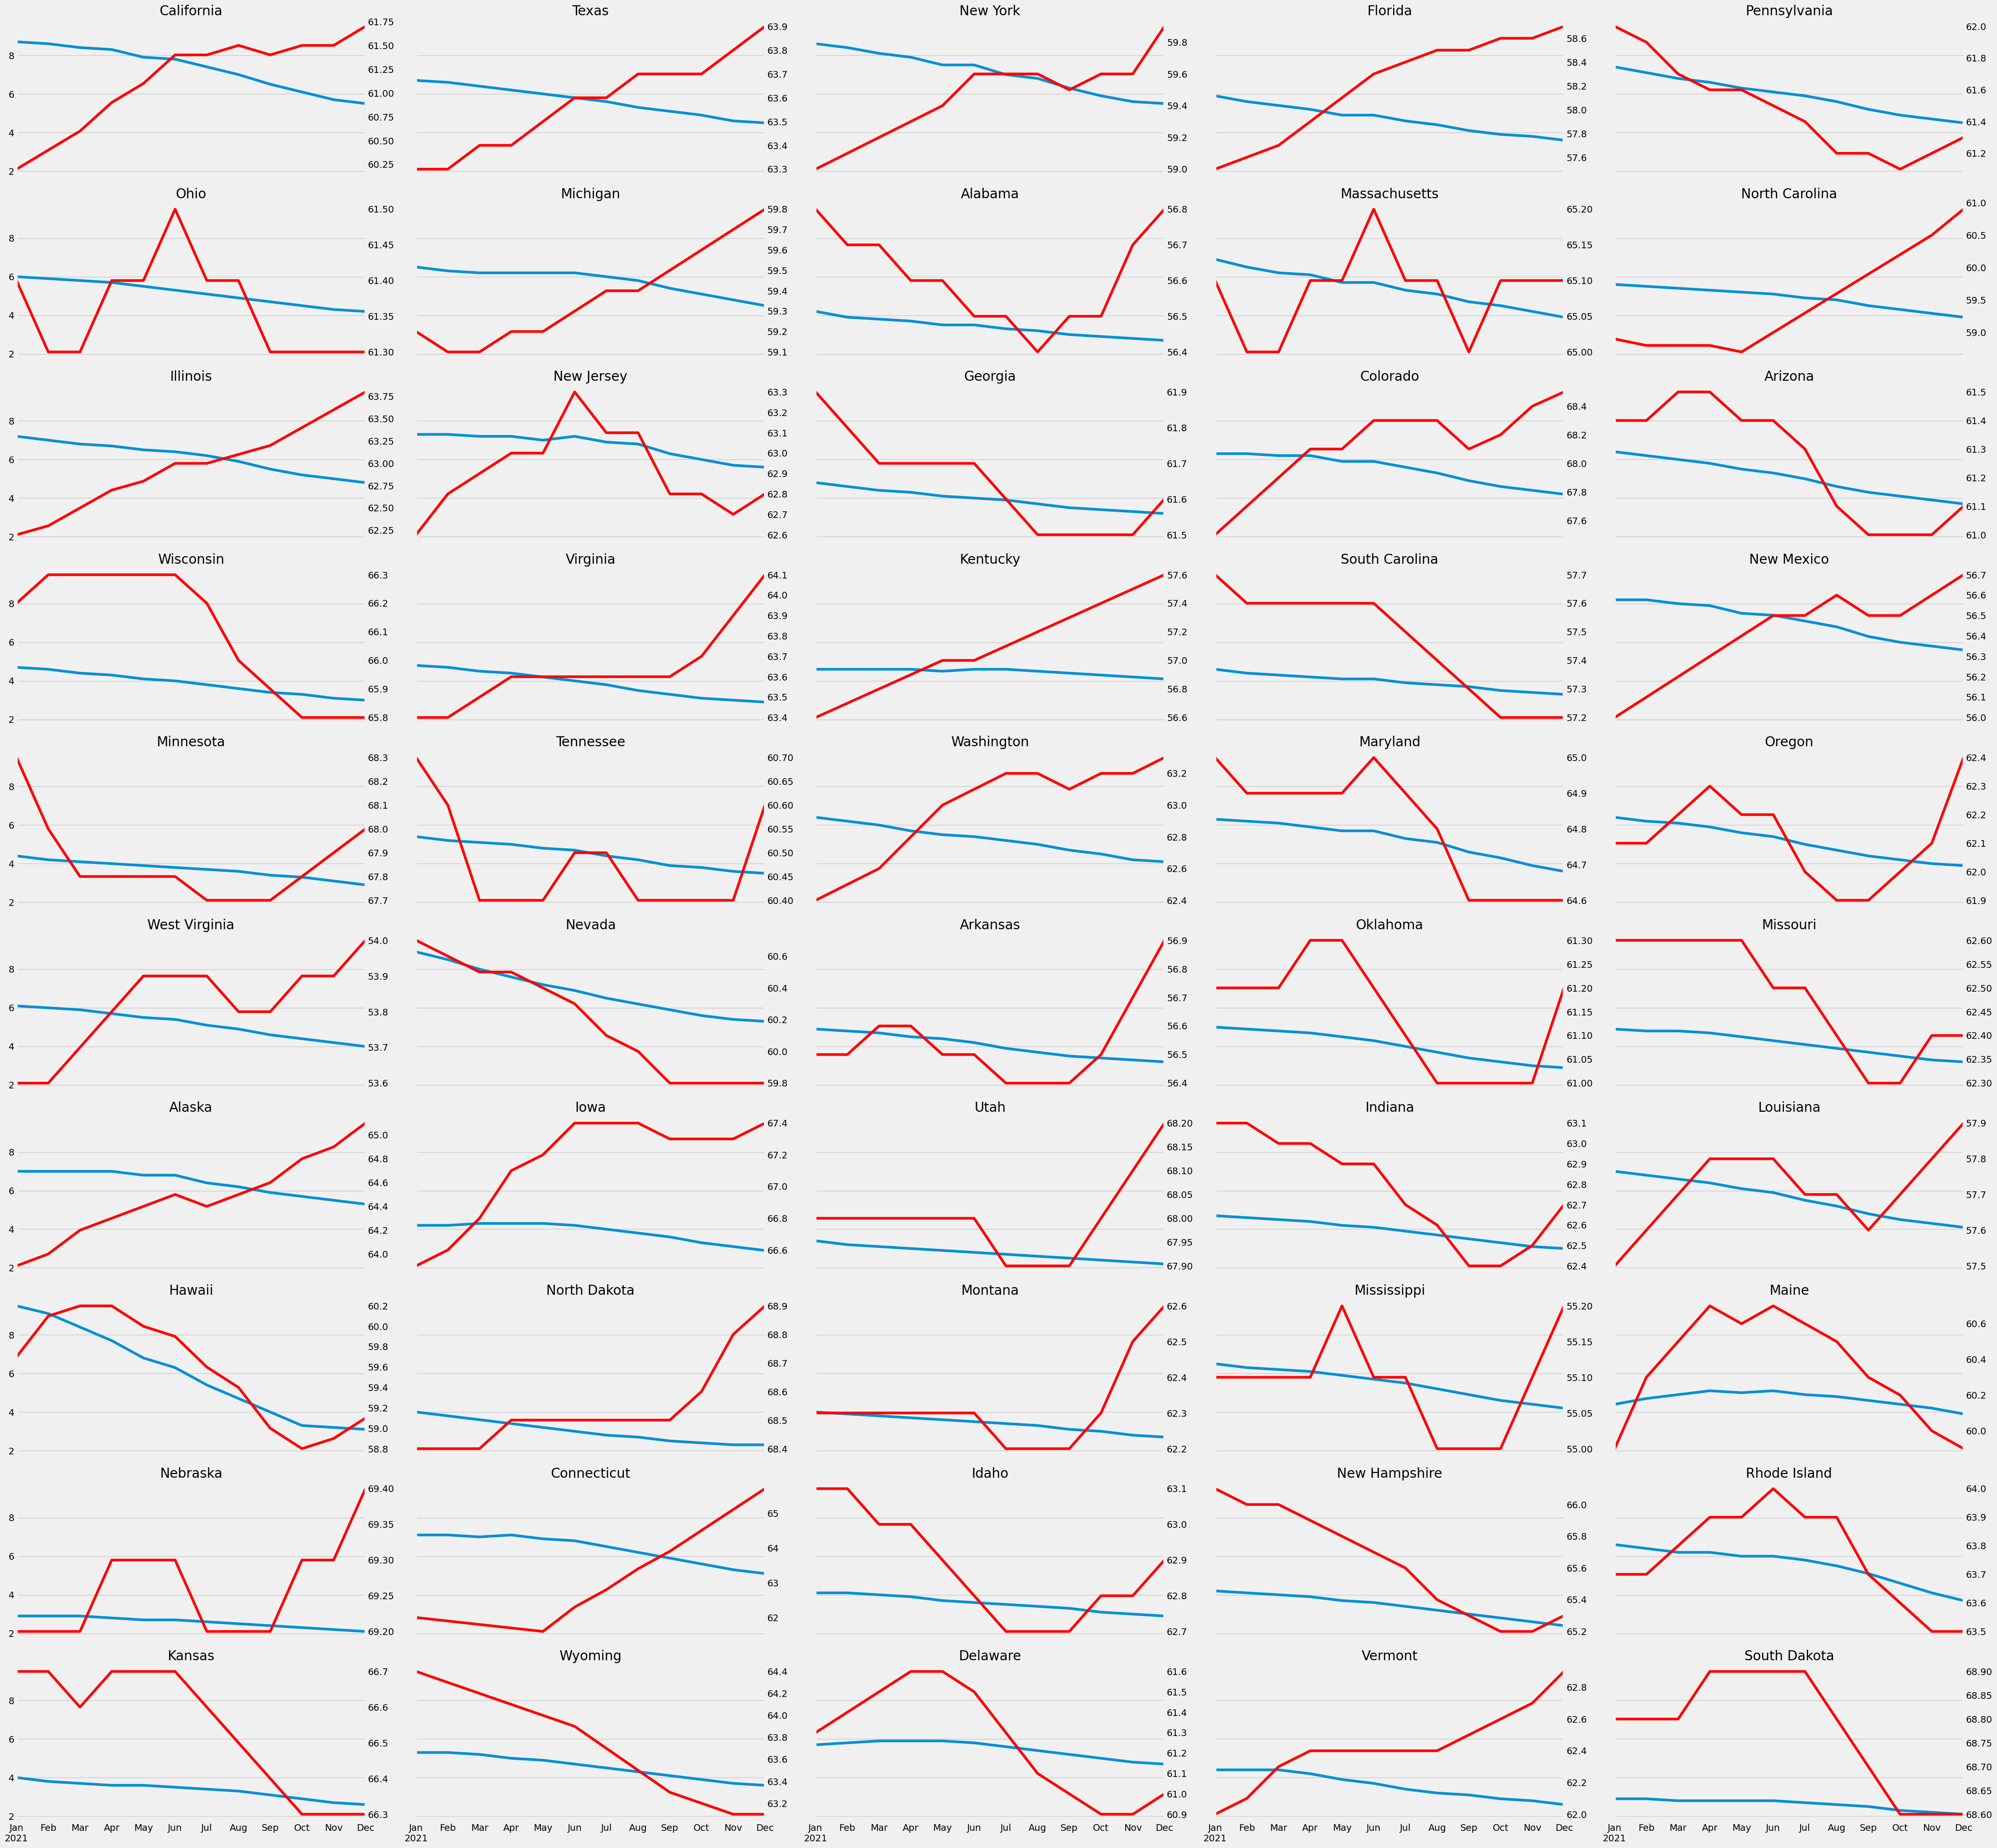

In [137]:
fig, axs=plt.subplots(10,5, figsize=(42,39),sharex=True, sharey=True)
axs=axs.flatten()
states = unemp_states.columns
states = [col for col in states if col in unemp_states.columns]

#Proceed with plotting
for i, state in enumerate(states):
    print(f"Processing state: {state}")
    ax2=axs[i].twinx( )
    unemp_states.query("index >= 2021 and index < 2022")[state].plot(ax=axs[i], label="Unemployment")
    part_states.query("index >= 2021 and index < 2022")[state].plot(ax=ax2, label="Participation", color="Red")
    ax2.grid(False)
    axs[i].set_title(state)
    i+=1
plt.tight_layout()
plt.show()